In [25]:
%matplotlib inline
import numpy as np
from scipy.io import loadmat
import utils7
from IPython.display import HTML
import matplotlib as mpl
import matplotlib.pyplot as plt

# K-Means Components

In [26]:
#load data
data = loadmat('ex7data2.mat')
X = data['X']

In [27]:
# function to find closest centroid
def findClosestCentroids(X, centroids):

    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)

    for i in np.arange(idx.size):
        J = np.sqrt(np.sum(np.square(X[i] - centroids), axis = 1))
        idx[i] = np.argmin(J)
    
    return idx

In [28]:
# test centroid finder
K = 3
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

idx = findClosestCentroids(X, initial_centroids)

print('Closest centroids for the first 3 examples:')
print(idx[:3])
print('(the closest centroids should be 0, 2, 1 respectively)')

Closest centroids for the first 3 examples:
[0 2 1]
(the closest centroids should be 0, 2, 1 respectively)


In [29]:
# compute means for each cluster
def computeCentroids(X, idx, K):
    m, n = X.shape
    centroid_means = np.zeros((K, n))
    for i in np.arange(K):
        centroid_means[i] = np.mean(X[idx==i], axis=0)

    return centroid_means

In [30]:
# test centroid mean calculator
centroids = computeCentroids(X, idx, K)

print('Centroids computed after initial finding of closest centroids:')
print(centroids)
print('\nThe centroids should be')
print('   [ 2.428301 3.157924 ]')
print('   [ 5.813503 2.633656 ]')
print('   [ 7.119387 3.616684 ]')

Centroids computed after initial finding of closest centroids:
[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]

The centroids should be
   [ 2.428301 3.157924 ]
   [ 5.813503 2.633656 ]
   [ 7.119387 3.616684 ]


# Full K-Means Routine

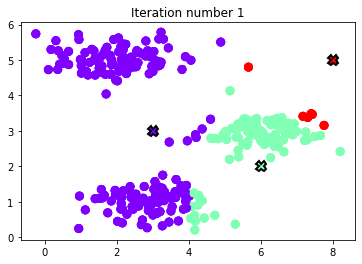

In [31]:
# run supplied runKmeans function
K = 3
max_iters = 10
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

centroids, idx, anim = utils7.runKmeans(X, initial_centroids, findClosestCentroids, computeCentroids, max_iters, True)

HTML(anim.to_html5_video())

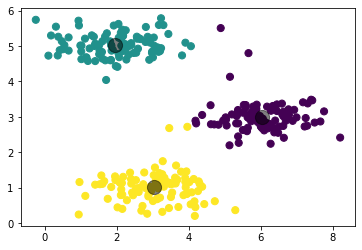

In [32]:
# compare to sklearn - similar, but a 
from sklearn.cluster import KMeans

skmeans = KMeans(n_clusters=3)
skmeans.fit(X)
y_skmeans = skmeans.predict(X)
centers = skmeans.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=y_skmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

# Image Compression

In [33]:
# random initialization
def kMeansInitCentroid(X, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[:K], :]
    return centroids

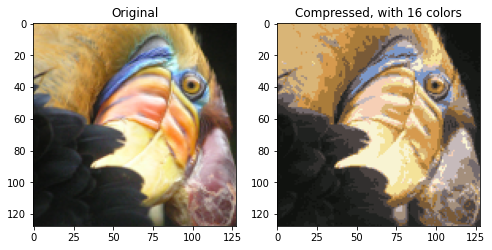

In [34]:
#compress to 16 colors using Kmeans
K = 16
max_iters = 10

# load bird pic
img = mpl.image.imread('bird_small.png')

img /= 255

# rehape into an nx3 matrix where n=number of pixels
X = img.reshape(-1, 3)

initial_centroids = kMeansInitCentroid(X, K)

# run kmeans
centroids, idx = utils7.runKmeans(X, initial_centroids, findClosestCentroids, computeCentroids, max_iters)

# recover image
X_recovered = centroids[idx, :].reshape(img.shape)

# plot original
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(img*255)
ax[0].set_title('Original')
ax[0].grid(False)

# and compressed
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed, with %d colors' % K)
ax[1].grid(False)

# PCA

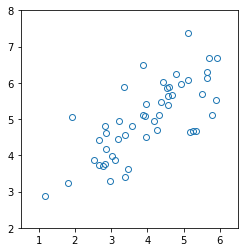

In [35]:
data = loadmat('ex7data1.mat')
X = data['X']

plt.plot(X[:, 0], X[:, 1], 'o', fillstyle='none')
plt.axis([0.5, 6.5, 2, 8])
plt.gca().set_aspect('equal')
plt.grid(False)

In [36]:
# define PCA function
def pca(X):
    m, n = X.shape
    U = np.zeros(n)
    S = np.zeros(n)

    sigma = (1/m) * (X.T.dot(X))
    U, S, V = np.linalg.svd(sigma)

    return U, S

Top eigenvector: U[:, 0] = [-0.707107 -0.707107]
 (you should expect to see [-0.707107 -0.707107])


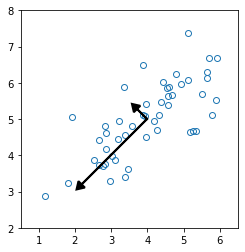

In [37]:
# run PCA
X_norm, mu, sigma = utils7.featureNormalize(X)

U, S = pca(X_norm)

fig, ax = plt.subplots()
ax.plot(X[:, 0], X[:, 1], 'o', fillstyle='none')

for i in range(2):
    ax.arrow(mu[0], mu[1], 1.5 * S[i]*U[0, i], 1.5 * S[i]*U[1, i], head_width=0.25, head_length=0.2, fc='k', ec='k', lw=2, zorder=1000)

ax.axis([0.5, 6.5, 2, 8])
ax.set_aspect('equal')
ax.grid(False)

print('Top eigenvector: U[:, 0] = [{:.6f} {:.6f}]'.format(U[0, 0], U[1, 0]))
print(' (you should expect to see [-0.707107 -0.707107])')

In [38]:
# compare to sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

spca = PCA()
spca = spca.fit(X_scaled)
print(spca.components_)
print(spca.explained_variance_)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[1.77094936 0.26986696]


In [39]:
# function to plot vectors
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

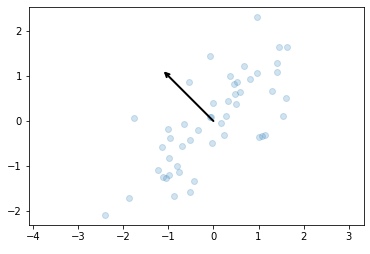

In [40]:
# plot data
plt.scatter(X_norm[:, 0], X_norm[:, 1], alpha=0.2)
for length, vector in zip(spca.explained_variance_, spca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(spca.mean_, spca.mean_ + v)
plt.axis('equal');

Hmmm, looks like it found overlapping components.

## Dimensionality Reduction

In [41]:
def projectData(X, U, K):
    Z = np.zeros((X.shape[0], K))
    Z = np.dot(X, U[:, :K])
    return Z

In [42]:
# test the projection
K = 1
Z = projectData(X_norm, U, K)
print('Projection of the first example: {:.6f}'.format(Z[0, 0]))
print('(this value should be about    : 1.481274)')

Projection of the first example: 1.481274
(this value should be about    : 1.481274)


In [43]:
def recoverData(Z, U, K):
    X_rec = np.zeros((Z.shape[0], U.shape[0]))
    X_rec = Z.dot(U[:, :K].T)
    return X_rec

Approximation of the first example: [-1.047419 -1.047419]
       (this value should be about  [-1.047419 -1.047419])


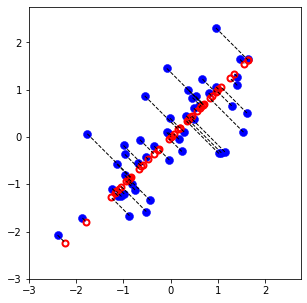

In [44]:
X_rec  = recoverData(Z, U, K)
print('Approximation of the first example: [{:.6f} {:.6f}]'.format(X_rec[0, 0], X_rec[0, 1]))
print('       (this value should be about  [-1.047419 -1.047419])')

#  Plot the normalized dataset (returned from featureNormalize)
fig, ax = mpl.pyplot.subplots(figsize=(5, 5))
ax.plot(X_norm[:, 0], X_norm[:, 1], 'bo', ms=8, mec='b', mew=0.5)
ax.set_aspect('equal')
ax.grid(False)
plt.axis([-3, 2.75, -3, 2.75])

# Draw lines connecting the projected points to the original points
ax.plot(X_rec[:, 0], X_rec[:, 1], 'ro', mec='r', mew=2, mfc='none')
for xnorm, xrec in zip(X_norm, X_rec):
    ax.plot([xnorm[0], xrec[0]], [xnorm[1], xrec[1]], '--k', lw=1)

# Facial Images

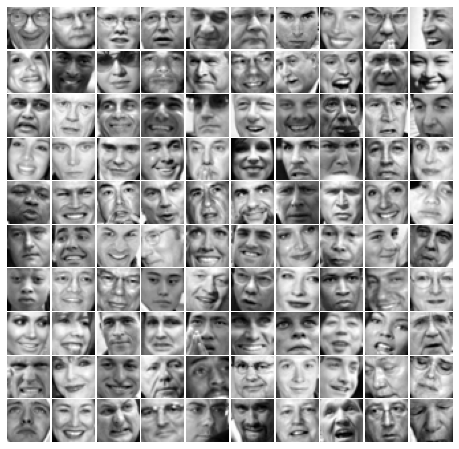

In [45]:
data = loadmat('ex7faces.mat')
X = data['X']

utils7.displayData(X[:100, :], figsize=(8, 8))

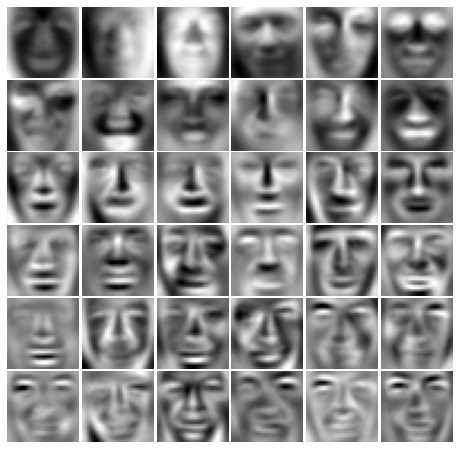

In [46]:
#  normalize X by subtracting the mean value from each feature
X_norm, mu, sigma = utils7.featureNormalize(X)

#  Run PCA
U, S = pca(X_norm)

#  Visualize the top 36 eigenvectors found
utils7.displayData(U[:, :36].T, figsize=(8, 8))

In [47]:
#  Project images to the eigen space using the top k eigenvectors 
#  If you are applying a machine learning algorithm 
K = 100
Z = projectData(X_norm, U, K)

print('The projected data Z has a shape of: ', Z.shape)


The projected data Z has a shape of:  (5000, 100)


In [ ]:
#  Project images to the eigen space using the top K eigen vectors and 
#  visualize only using those K dimensions
#  Compare to the original input, which is also displayed
K = 100
X_rec  = recoverData(Z, U, K)

# Display normalized data
utils7.displayData(X_norm[:100, :], figsize=(6, 6))
plt.gcf().suptitle('Original faces')

# Display reconstructed data from only k eigenfaces
utils7.displayData(X_rec[:100, :], figsize=(6, 6))
plt.gcf().suptitle('Recovered faces')
pass

